# **Challenge of the Week: Full DL Solution**

---
###**Case Study:** Stroke Prediction

**Objective:** The goal of this challenge is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this challenge, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [3]:
#Test Your Zaka
import pandas as pd
import numpy as np

#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [4]:
#Test Your Zaka
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [5]:
#Test Your Zaka
print("The number of the samples are : ",df.shape[0])
print("The number of the Features are : ",df.shape[1])

The number of the samples are :  5110
The number of the Features are :  12


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [6]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**The BMI has missing values (201 value)**

In [7]:
df.isnull().sum(axis = 0)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###Dealing with categorical variables

**# the categorical Fetures we have in the Data are: gender , ever_married , work_type ,Residence_type , smoking_status, also: hypertension	heart_disease stroke**

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

'smoking_status'

In [8]:
#Test Your Zaka
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

'Residence_type'

In [9]:
#Test Your Zaka
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

'work_type'

In [10]:
#Test Your Zaka
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

'ever_married'

In [11]:
#Test Your Zaka
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

'hypertension'

In [12]:
#Test Your Zaka
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

'heart_disease'

In [13]:
#Test Your Zaka
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [14]:
#Gender check
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**From the previoues there a clear bias in the data through: hypertension 0, heart_disease 0**

'stroke'

In [15]:
#Test Your Zaka
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Unbalance Data: Bias from 0**

#Preprocessing

###Dealing with Nulls

####Encoding Categorical Features

Here you will encode those categorical variables to be able to use them to train our DL model.

In [16]:
#Test Your Zaka
###gender , ever_married , work_type ,Residence_type , smoking_status###
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.gender=le.fit_transform(df.gender)
df.ever_married=le.fit_transform(df.ever_married)
df.work_type=le.fit_transform(df.work_type)
df.Residence_type=le.fit_transform(df.Residence_type)
df.smoking_status=le.fit_transform(df.smoking_status)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


Fill the nulls with the mean value, and make sure you have no nulls anymore

In [17]:
#Test Your Zaka
df.bmi.fillna(df.bmi.mean(),inplace=True) 

In [18]:
df.isnull().sum(axis = 0)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###Normalizing Features

Now you normalize the input data by dividing with the max value of each column.

In [19]:
#Test Your Zaka
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.12321436 0.5        0.81689453 ... 0.30126002 0.33333333 1.        ]
 [0.70820468 0.         0.74365234 ... 0.21298095 0.66666667 1.        ]
 [0.42601512 0.5        0.97558594 ... 0.25429553 0.66666667 1.        ]
 ...
 [0.26972953 0.         0.42626953 ... 0.2325315  0.66666667 0.        ]
 [0.51427826 0.5        0.62158203 ... 0.17525773 0.33333333 0.        ]
 [0.61218833 0.         0.53613281 ... 0.18213058 0.         0.        ]]


###Removing Unnecessary Features

From the features that we have, remove one that is irrelevant for our predictions

In [20]:
#Test Your Zaka
#clearly the id 
df.drop('id',axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


#Building the DL Model

Now it's time to build the actual model, and observe a summary of it.<br>
The sizes of the **hidden** layers that you should use are: [32,16,8,4,2].
The activation for each of those hidden layers is 'relu'
<br>
Print the summary of your model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-trainabl

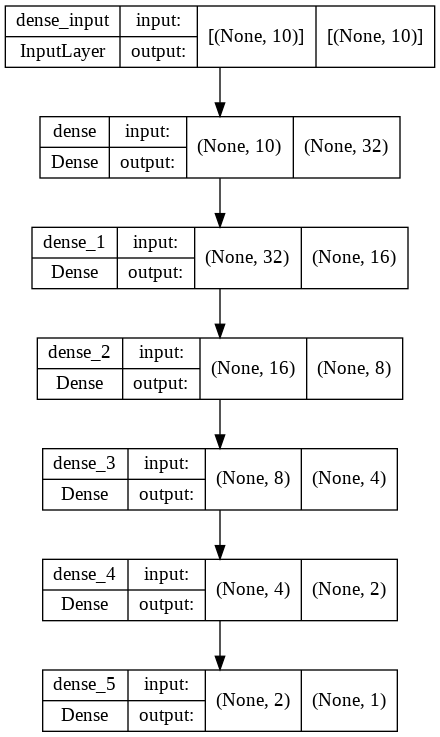

In [21]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
          
#print model
model.summary()
#Plot model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

###Compiling the model

Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.
We will use 'adam' as optimizer.

In [22]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',precision_m, recall_m])


###Fitting the data

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%). The training happens for 15 epochs.

In [23]:
#Test Your Zaka

X= np.array(df.iloc[:,0:-1].values)
Y= np.array(df.iloc[:,-1].values)

#split data manulaly
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

# fit the model
history = model.fit(x_train, y_train, epochs=15,batch_size=10,verbose=0)

# evaluate the model

loss, accuracy, precision, recall = model.evaluate(x_test, y_test)

print('loss : ',loss,'accuaracy', accuracy, 'precision',precision, 'recall',recall )

48/48 [==============================] - 0s 2ms/step - loss: 0.1761 - acc: 0.9504 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
loss :  0.17613902688026428 accuaracy 0.9504240155220032 precision 0.0 recall 0.0


In [24]:
##Or
y_pred=np.round(model.predict(x_test))
y_pred
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print('Accuaracy: %.3f' % accuracy)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)


Accuaracy: 0.950
Precision: 0.000
Recall: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What can you deduce from the results you obtained?

**the modal has a very good accuracy, but bad precision and recall; this due to the bias in the data**

#Improving DL Models

###Checking For Data Imbalance

Plot a histogram that shows the distribution of 'stroke' column

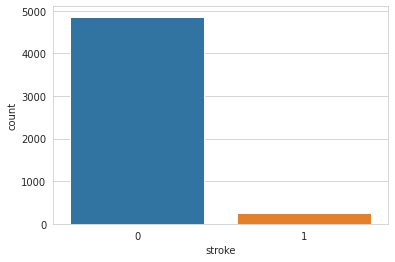

In [25]:
#Test Your Zaka
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.countplot(x =df['stroke'], data = df)

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

This time, you will learn to oversample using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

After doing that, plot the new histogram showing the proportions of people having stroke or not

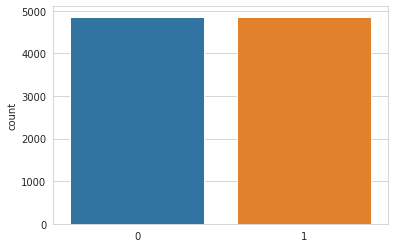

In [26]:
#Test Your Zaka
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(X,Y)
sns.countplot(x =y_res)

Now we will fit our same model on the new balanced data that we have, with the same conditions we had before (train/test splits, epochs, etc)

In [27]:
#Test Your Zaka

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_res,y_res, test_size=0.3, random_state=0)

# fit the model
history = model.fit(x_train1, y_train1, epochs=15,batch_size=10)

# evaluate the model
loss1, accuracy1, precision1, recall1 = model.evaluate(x_test1, y_test1)

print('loss : ',loss1,'accuaracy', accuracy1, 'precision',precision1, 'recall',recall1 )

Epoch 1/15
681/681 [==============================] - 2s 2ms/step - loss: 0.4995 - acc: 0.7536 - precision_m: 0.7163 - recall_m: 0.8256
Epoch 2/15
681/681 [==============================] - 2s 2ms/step - loss: 0.4815 - acc: 0.7615 - precision_m: 0.7325 - recall_m: 0.8197
Epoch 3/15
681/681 [==============================] - 1s 2ms/step - loss: 0.4737 - acc: 0.7697 - precision_m: 0.7405 - recall_m: 0.8324
Epoch 4/15
681/681 [==============================] - 1s 2ms/step - loss: 0.4733 - acc: 0.7696 - precision_m: 0.7410 - recall_m: 0.8280
Epoch 5/15
681/681 [==============================] - 1s 2ms/step - loss: 0.4706 - acc: 0.7708 - precision_m: 0.7364 - recall_m: 0.8294
Epoch 6/15
681/681 [==============================] - 1s 2ms/step - loss: 0.4682 - acc: 0.7741 - precision_m: 0.7459 - recall_m: 0.8265
Epoch 7/15
681/681 [==============================] - 1s 2ms/step - loss: 0.4679 - acc: 0.7747 - precision_m: 0.7504 - recall_m: 0.8294
Epoch 8/15
681/681 [============================

In [28]:
y_pred1=np.round(model.predict(x_test1))

accuracy1=accuracy_score(y_test1, y_pred1)
print('Accuaracy: %.3f' % accuracy1)

precision1= precision_score(y_test1, y_pred1, labels=[1,2], average='micro')
print('Precision: %.3f' % precision1)

recall1 = recall_score(y_test1, y_pred1, average='binary')
print('Recall: %.3f' % recall1)

Accuaracy: 0.778
Precision: 0.815
Recall: 0.723


Comment the performance you obtained

**[The accuaracy decrease, but the precision and recall increas than the previoues model when training, but it still law]**

###Model Design

Now you will introduce batch normalization after each layer of your network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Batc  (None, 8)               

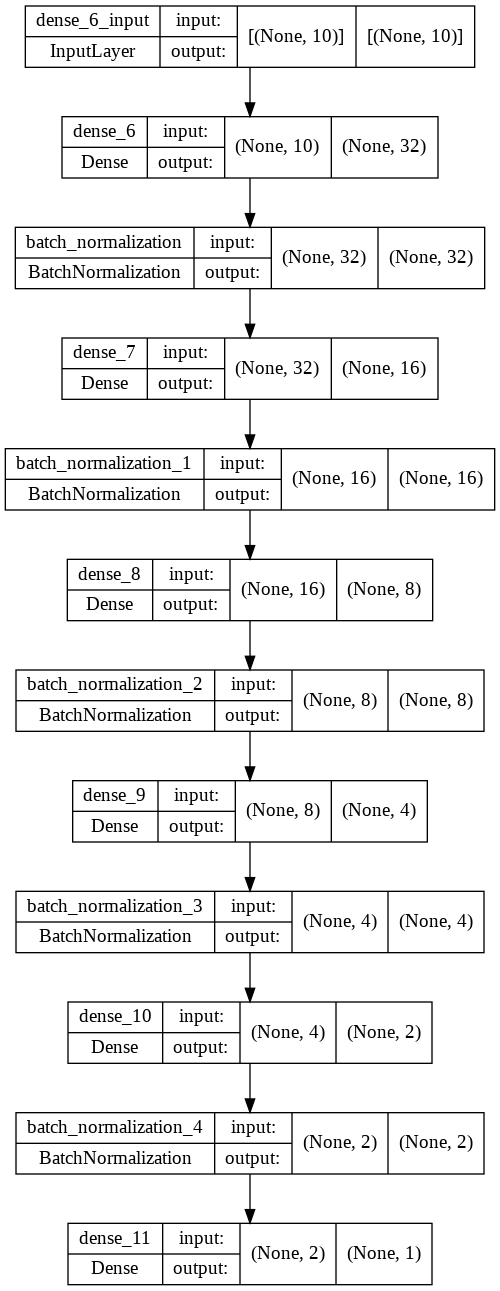

In [29]:
#Test Your Zaka
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
model.add(BatchNormalization())
model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
model.add(BatchNormalization())
model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
model.add(BatchNormalization())
model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
model.add(BatchNormalization())
model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
          
#print model
model.summary()
#Plot model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



Let's train the model with the same conditions as before

In [30]:
#Test Your Zaka
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',precision_m, recall_m])
model.fit(x_train1, y_train1, epochs=15,batch_size=10)

# evaluate the model
loss2, accuracy2, precision2, recall2 = model.evaluate(x_test1, y_test1)

print('loss : ',loss2,'accuaracy', accuracy2, 'precision',precision2, 'recall',recall2 )

Epoch 1/15
681/681 [==============================] - 4s 3ms/step - loss: 0.5873 - acc: 0.7299 - precision_m: 0.7475 - recall_m: 0.7082
Epoch 2/15
681/681 [==============================] - 2s 3ms/step - loss: 0.5175 - acc: 0.7672 - precision_m: 0.7449 - recall_m: 0.8351
Epoch 3/15
681/681 [==============================] - 2s 3ms/step - loss: 0.5145 - acc: 0.7584 - precision_m: 0.7364 - recall_m: 0.8281
Epoch 4/15
681/681 [==============================] - 2s 3ms/step - loss: 0.5094 - acc: 0.7614 - precision_m: 0.7336 - recall_m: 0.8431
Epoch 5/15
681/681 [==============================] - 2s 3ms/step - loss: 0.5046 - acc: 0.7534 - precision_m: 0.7238 - recall_m: 0.8421
Epoch 6/15
681/681 [==============================] - 4s 6ms/step - loss: 0.5014 - acc: 0.7650 - precision_m: 0.7380 - recall_m: 0.8454
Epoch 7/15
681/681 [==============================] - 2s 3ms/step - loss: 0.5001 - acc: 0.7583 - precision_m: 0.7312 - recall_m: 0.8304
Epoch 8/15
681/681 [============================

Comment the performance of your model

**[After the BN, the model become more much better , as shown the values of the evaluating metrics all be high value more than the previoues improving, this mean by the BN, the bias from data has no more effect on the data]**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our model inside a kerasClassifier to be able to use it in Scikit Learn

In [35]:
#Test Your Zaka
def create_model():
  model = Sequential()
  model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
  model.add(BatchNormalization())
  model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
  model.add(BatchNormalization())
  model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
  model.add(BatchNormalization())
  model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
  model.add(BatchNormalization())
  model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
    
# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',precision_m, recall_m])
  return model

  
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


We will tune the batch size (it can be 50 or 100) and the number of epochs (it can be 50 or 100).
We will use a 3 folds cross validation

In [36]:
#Test Your Zaka
model_1 = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=12)
results = cross_val_score(model_1,x_train1, y_train1, cv=kfold)
print(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


[0.81445569 0.84303349 0.83024693]


Find the best parameters according to the Grid Search you have done, and the accuracy for the best model.

In [37]:
#Test Your Zaka
#The hyperparameters want to tune are:  Batch Size and Number of Epochs, Training Optimization Algorithm,  Learning Rate and Momentum
#Tune Network Weight Initialization, Activation Function, Dropout Regularization, Number of Neurons in the Hidden Layer 

# Batch size and epoch
from sklearn.model_selection import GridSearchCV

model_2 = KerasClassifier(build_fn=create_model,verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model_2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Best: 0.838503 using {'batch_size': 100, 'epochs': 100}
0.777957 (0.001716) with: {'batch_size': 10, 'epochs': 10}
0.786483 (0.009521) with: {'batch_size': 10, 'epochs': 50}
0.808669 (0.005645) with: {'batch_size': 10, 'epochs': 100}
0.783836 (0.007117) with: {'batch_size': 20, 'epochs': 10}
0.815870 (0.005020) with: {'batch_size': 20, 'epochs': 50}
0.826599 (0.015432) with: {'batch_size': 20, 'epochs': 100}
0.788392 (0.011870) with: {'batch_size': 40, 'epochs': 10}
0.822041 (0.012361) with: {'batch_size': 40, 'epochs': 50}
0.826157 (0.001845) with: {'batch_size': 40, 'epochs': 100}
0.794562 (0.006757) with: {'batch_size': 60, 'epochs': 10}
0.823514 (0.010157) with: {'batch_size': 60, 'epochs': 50}
0.826598 (0.008046) with: {'batch_size': 60, 'epochs': 100}
0.773692 (0.029876) with: {'batch_size': 80, 'epochs': 10}
0.819543 (0.014114) with: {'batch_size': 80, 'epochs': 50}
0.791765 (0.026995) with: {'batch_size': 80, 'epochs': 100}
0.777809 (0.005830) with: {'batch_size': 100, 'epochs'

**as shown previoues best at batc size 100, epoch 100, but it take 20 min to execute the result!**

In [41]:
#Training Optimization Algorithm
def create_model_OA(optimizer='adam'):
  model = Sequential()
  model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
  model.add(BatchNormalization())
  model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
  model.add(BatchNormalization())
  model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
  model.add(BatchNormalization())
  model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
  model.add(BatchNormalization())
  model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
    
# Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
model_3 = KerasClassifier(build_fn=create_model_OA, epochs=15, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model_3, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.785011 using {'optimizer': 'RMSprop'}


**The best Algorithim optimizer is RMSprop**

In [56]:
#Learning Rate and Momentum
def create_model_RM(learn_rate=0.01, momentum=0):
	# create model
  from keras.optimizers import adam_v2
  model = Sequential()
  model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
  model.add(BatchNormalization())
  model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
  model.add(BatchNormalization())
  model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
  model.add(BatchNormalization())
  model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
  model.add(BatchNormalization())
  model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
    
# Compile model
  optimizer = adam_v2.Adam(lr=learn_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model_4 = KerasClassifier(build_fn=create_model_RM, epochs=15, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_4, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Best: 0.789418 using {'learn_rate': 0.001}


**Best 'learn_rate': 0.001**

In [60]:
#Dropout
from keras.layers import Dropout

def create_model_D(dropout_rate=0.0, weight_constraint=0):
	# create model
  model = Sequential()
  model.add(Dense(32, input_dim = 10, activation = 'relu')) #Hidden Layer 1
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu')) #Hidden Layer 2
  model.add(BatchNormalization())
  model.add(Dense(8, activation = 'relu')) #Hidden Layer 3
  model.add(BatchNormalization())
  model.add(Dense(4, activation = 'relu')) #Hidden Layer 4
  model.add(BatchNormalization())
  model.add(Dense(2, activation = 'relu')) #Hidden Layer 5
  model.add(BatchNormalization())
  model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	
  return model

# create model
model_5 = KerasClassifier(build_fn=create_model_D, epochs=15, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model_5, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.795151 using {'dropout_rate': 0.5, 'weight_constraint': 1}


Fit the model on the best hyperparameters we obtained.

**Final model with the epoch 100, batch size 100, optimizer RMSprop, learning rate 0.001, and drop out 0.5 with 'weight_constraint': 1**

In [125]:
#Test Your Zaka
from keras.constraints import max_norm

def create_model_Final():
  model = Sequential()
  model.add(Dense(32, input_dim = 10,activation = 'relu', kernel_constraint=max_norm(1), bias_constraint=max_norm(1)))
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.5))
  model.add(Dense(16,activation = 'relu', kernel_constraint=max_norm(1), bias_constraint=max_norm(1))) #Hidden Layer 2
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.5))
  model.add(Dense(8,activation = 'relu', kernel_constraint=max_norm(1), bias_constraint=max_norm(1)))  #Hidden Layer 3
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.5))
  model.add(Dense(4,activation = 'relu', kernel_constraint=max_norm(1), bias_constraint=max_norm(1))) #Hidden Layer 4
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.5))
  model.add(Dense(2,activation = 'relu', kernel_constraint=max_norm(1), bias_constraint=max_norm(1))) #Hidden Layer 5
  model.add(BatchNormalization())
  model.add(Dropout(rate = 0.5))
  model.add(Dense(1, activation = "sigmoid"))  #output Layer; Classification problem; 2 class
    
# Compile model
  from tensorflow.keras.optimizers import RMSprop
  optimizer=RMSprop(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',precision_m, recall_m])
  return model

#model_F=create_model_Final()
#model_F.fit(x_train1, y_train1, epochs=100,batch_size=100, verbose=0)
# evaluate the model
#loss3, accuracy3, precision3, recall3 = model_F.evaluate(x_test1, y_test1)
#print('loss : ',loss3,'accuaracy', accuracy3, 'precision',precision3, 'recall',recall3)

model_F = KerasClassifier(build_fn=create_model_Final, epochs=100, batch_size=100, verbose=0)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=12)
results = cross_val_score(model_F,x_train1, y_train1, cv=kfold)
print(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


[0.76553547 0.78791887 0.78483248]


Comment the performance of your model

**[the performance of model be much better, using the performance; its start by Accuaracy: 0.950
Precision: 0.000
Recall: 0.000**

**and End with [0.76553547 0.78791887 0.78483248]**

**the best model is model_1 [0.81445569 0.84303349 0.83024693], but it complex and requiere a lot of times comparing by the final model]**